# Result

After running several models Ridge regression provided the best results and its summarized below

Best Mean Cross-validation score: 20.387%

Ridge parameters:  {'alpha': 4.175318936560405}

Train  Performance :

train mse: 830.1996

train rmse: 28.8131

train r2: 23.44%

Test Performance :

test mse: 938.3361

test rmse: 30.6322

test r2: 19.866 %

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.pandas.set_option('display.max_columns', None)
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [3]:
data = pd.read_excel("patent_data.xlsx")


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 25 columns):
pat        65535 non-null int64
fwd        65535 non-null int64
lag_d      65535 non-null int64
lag_y      65535 non-null int64
noc        65535 non-null int64
gy         65535 non-null int64
ay         65535 non-null int64
noi        65535 non-null int64
UMC        65535 non-null int64
firm       65535 non-null int64
MSA        65535 non-null int64
tbm        65535 non-null int64
tbru       65535 non-null float64
PAG        65535 non-null float64
npr        65535 non-null int64
fpr        65535 non-null int64
FT         65535 non-null int64
Cent       65535 non-null float64
EXP_Y      65535 non-null float64
DT         65535 non-null float64
IT         65535 non-null float64
RT         65535 non-null float64
3rd_PT     65535 non-null float64
Rnd_Int    65535 non-null float64
FS         38808 non-null float64
dtypes: float64(10), int64(15)
memory usage: 12.5 MB


In [5]:
data.drop(columns=['lag_y'],inplace=True)

In [6]:
categorical=['gy','firm','ay','UMC','MSA','FT']

In [7]:
continuous=list(set(list(data.columns))-set(categorical))

In [8]:
continuous

['RT',
 'FS',
 'Cent',
 'tbm',
 'npr',
 'pat',
 'Rnd_Int',
 'fpr',
 'noi',
 'fwd',
 'lag_d',
 'tbru',
 'IT',
 'noc',
 '3rd_PT',
 'EXP_Y',
 'PAG',
 'DT']

In [9]:
# Pop 'fwd' with the index accordingly
continuous.pop(-9)

'fwd'

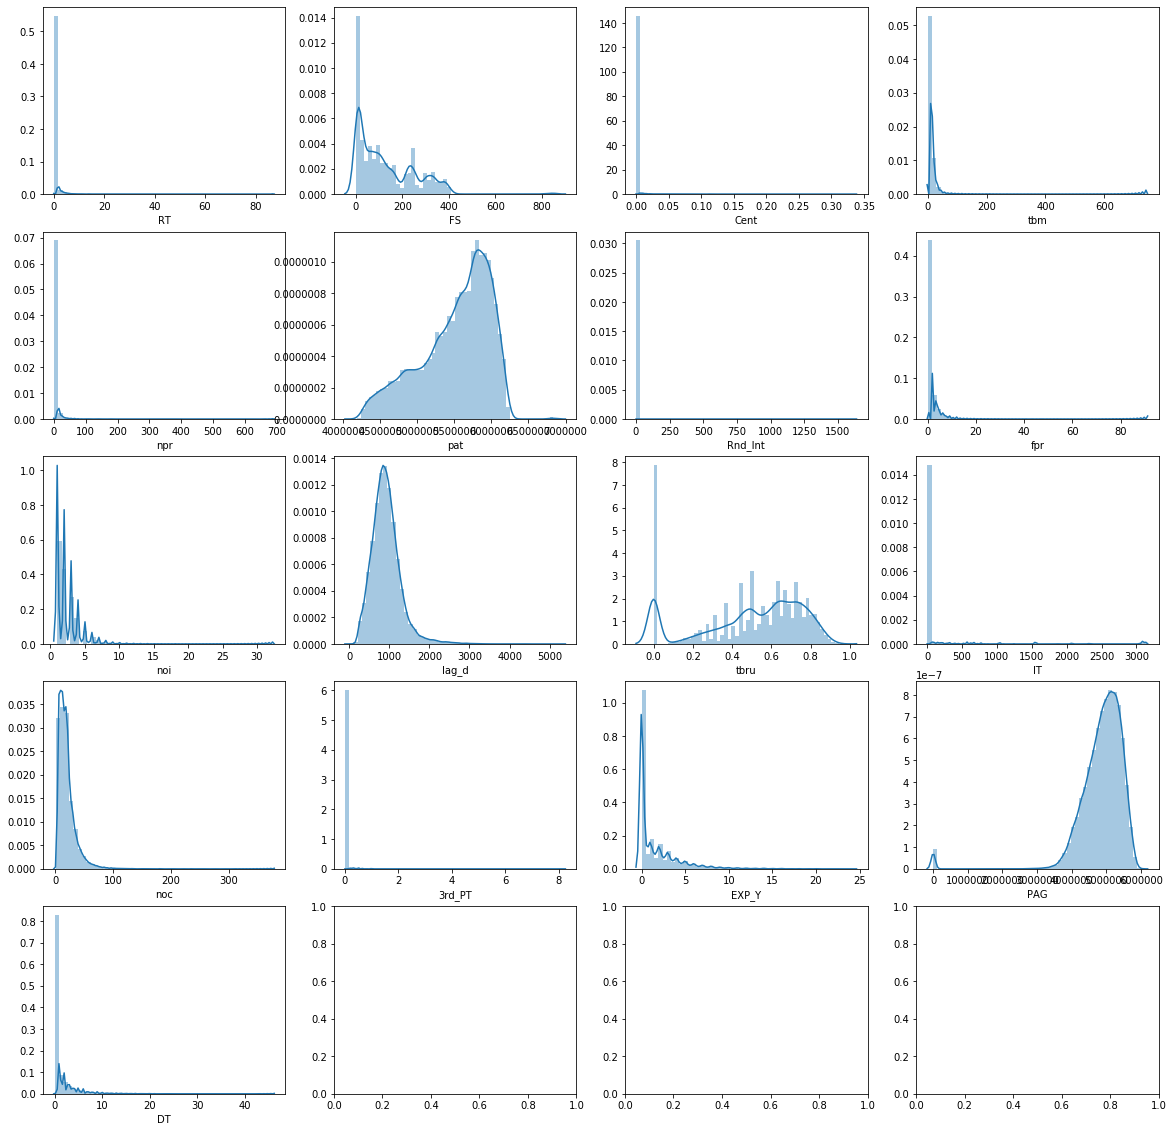

In [15]:
# Data Visualization
fig, axs = plt.subplots(ncols=4, nrows=5,figsize=(20,20))
axs = axs.flatten()

for i, var in enumerate(continuous):
    sns.distplot(data[data[var].notnull()][var], ax=axs[i]);

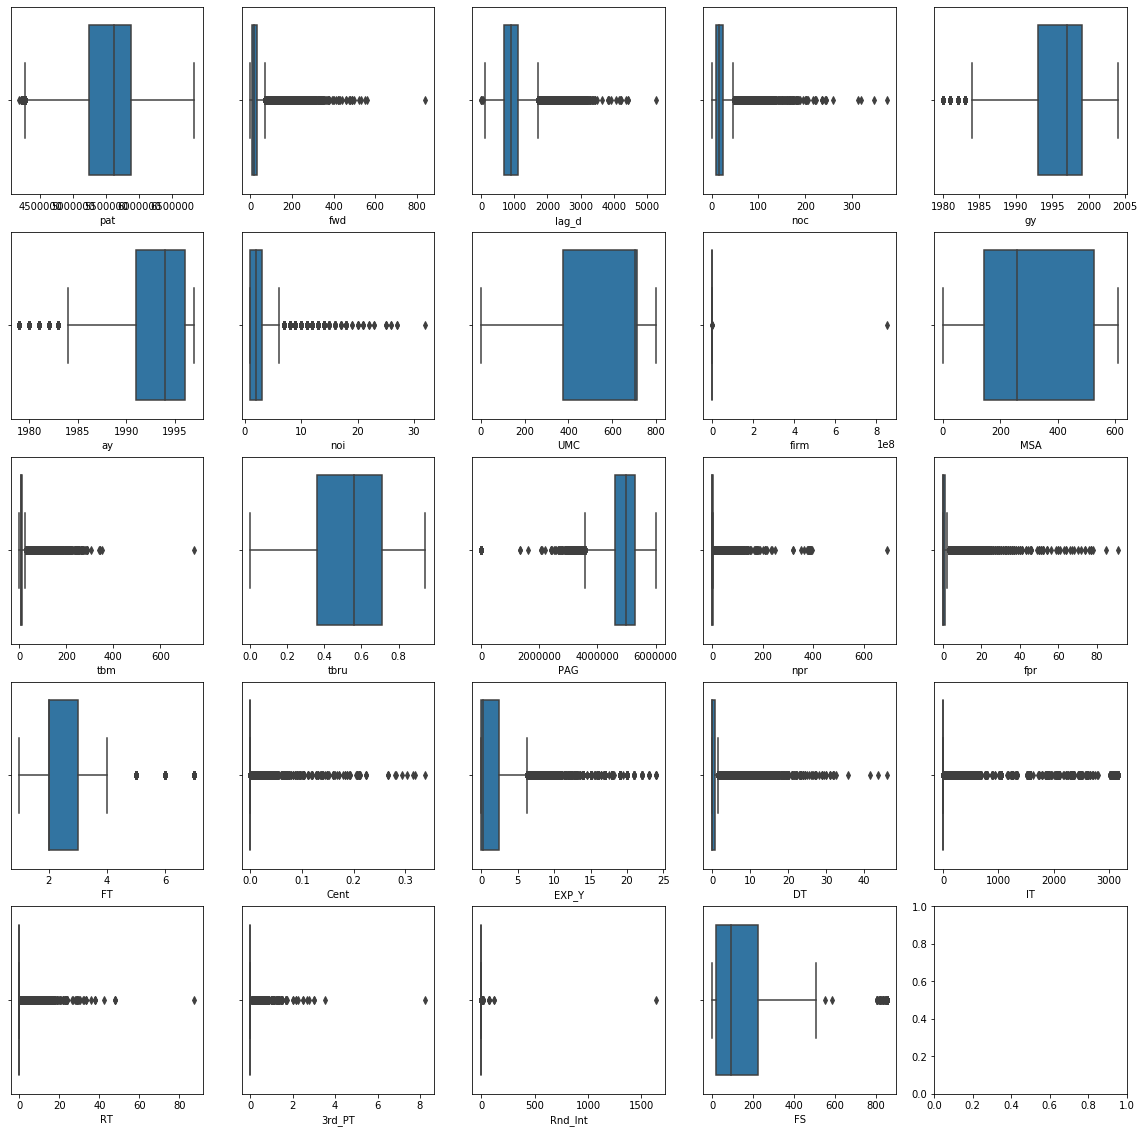

In [18]:
fig, axs = plt.subplots(ncols=5, nrows=5,figsize=(20,20))
axs = axs.flatten()

for i, var in enumerate(data):
    sns.boxplot(data[data[var].notnull()][var], ax=axs[i], orient='h');

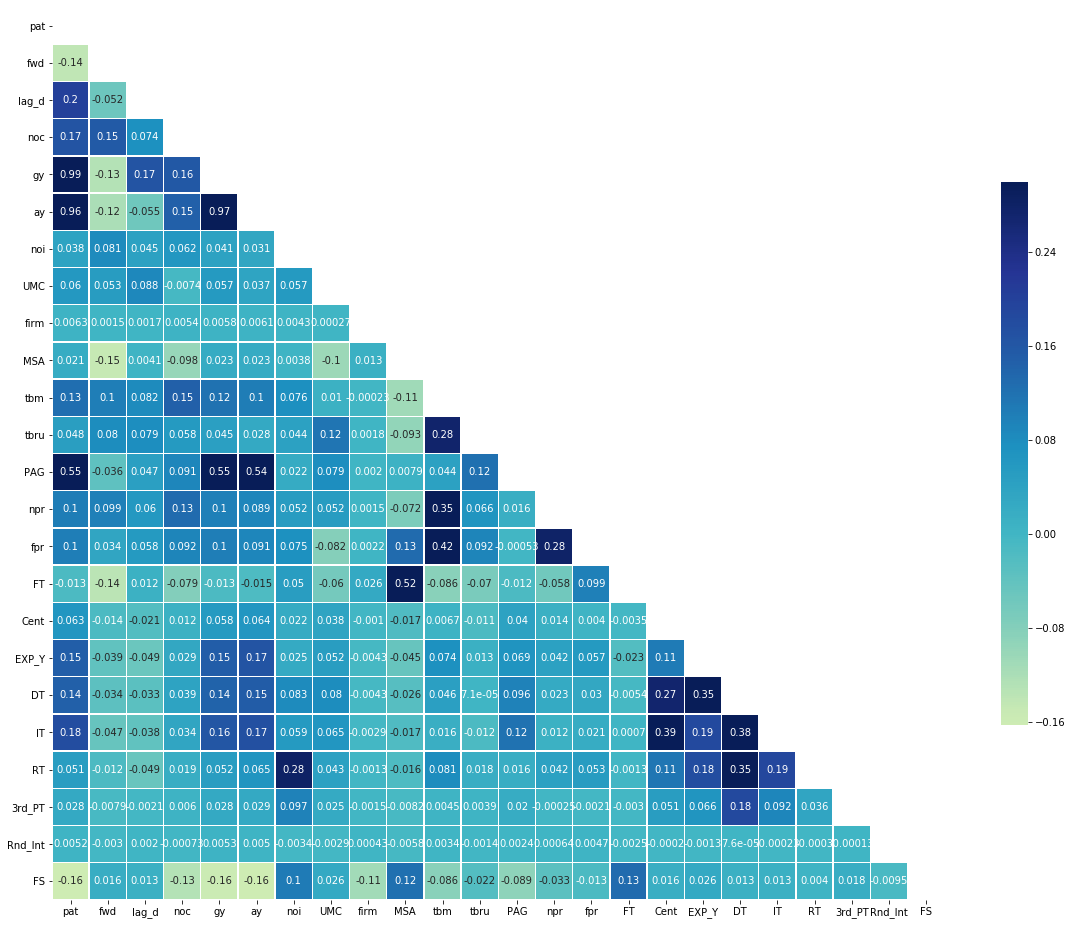

In [19]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap


# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(),annot=True, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

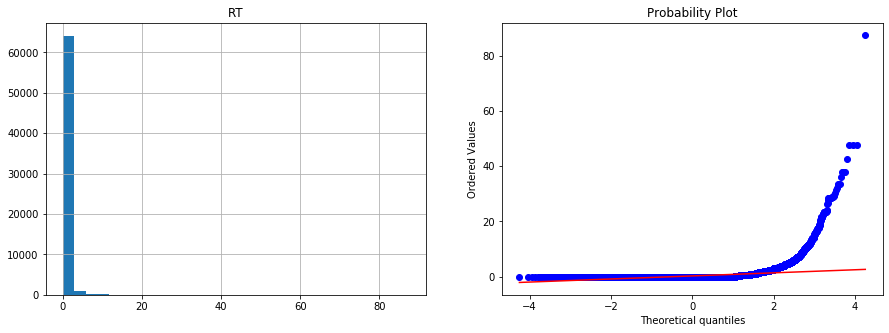

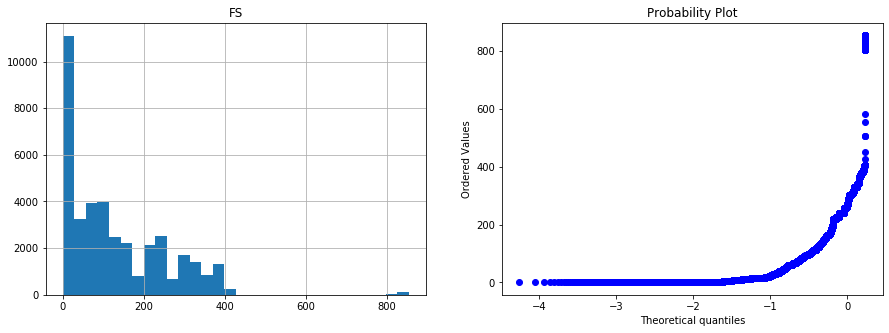

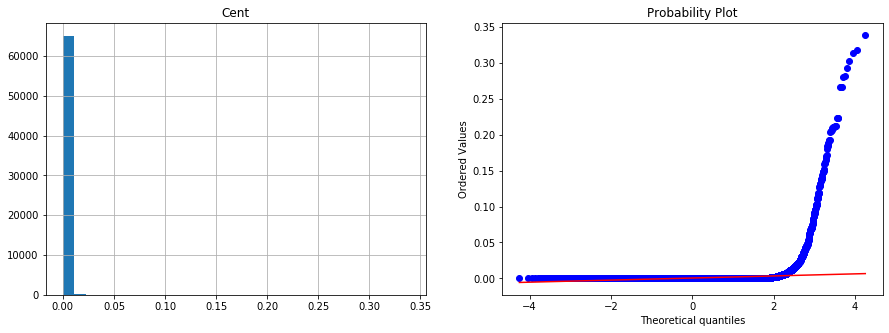

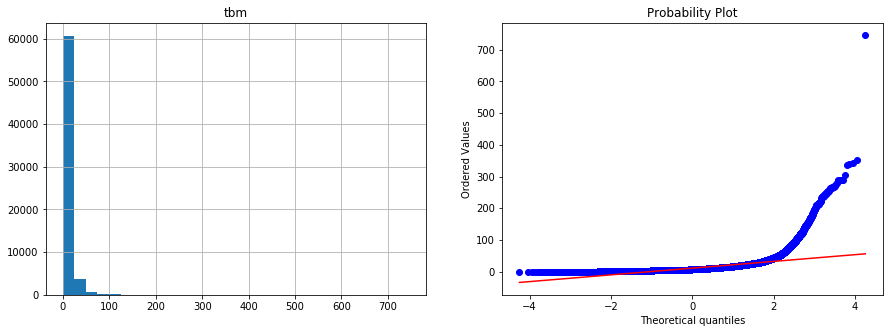

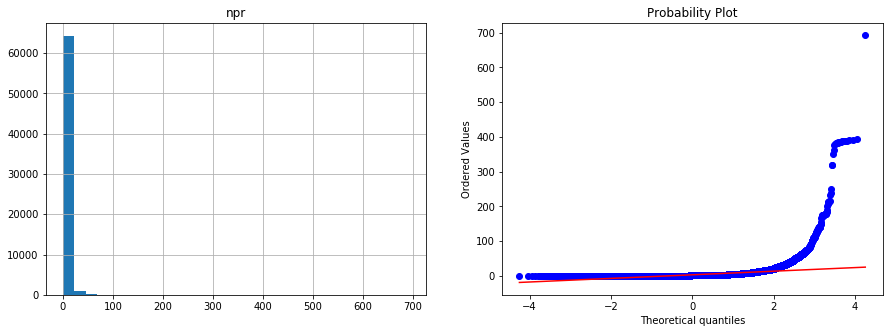

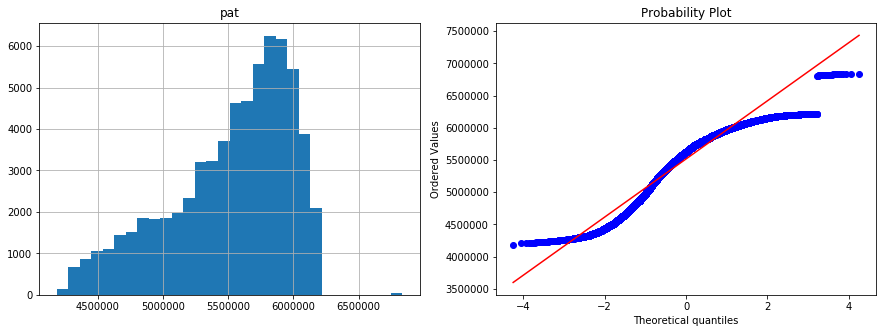

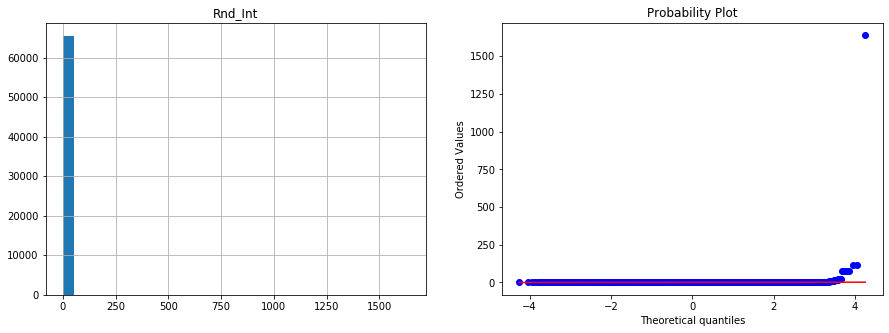

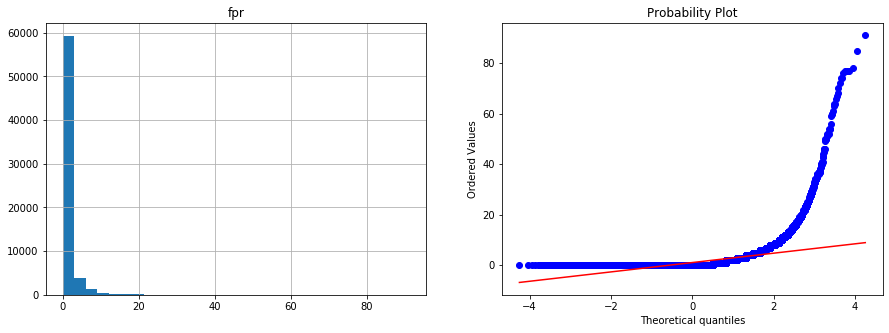

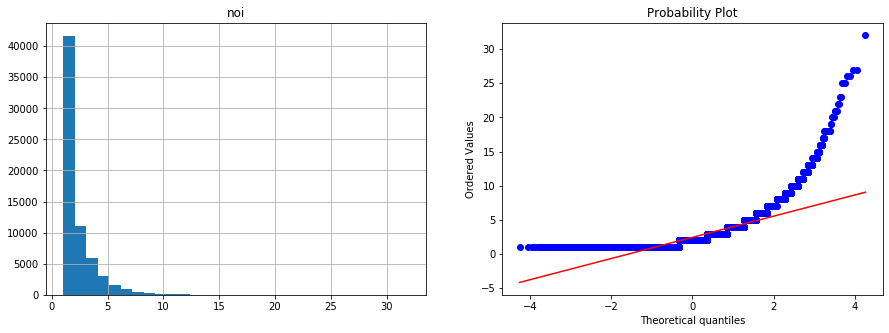

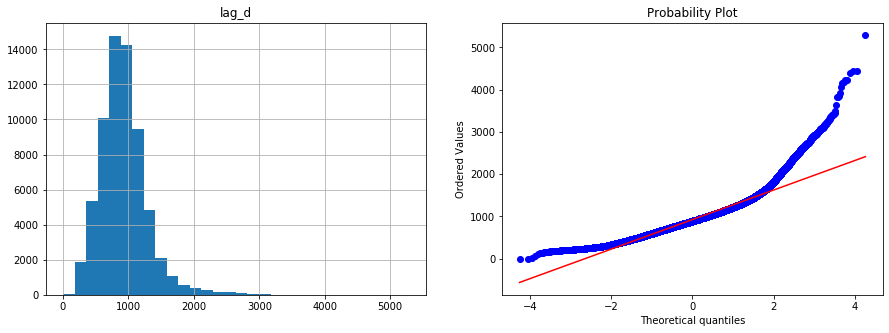

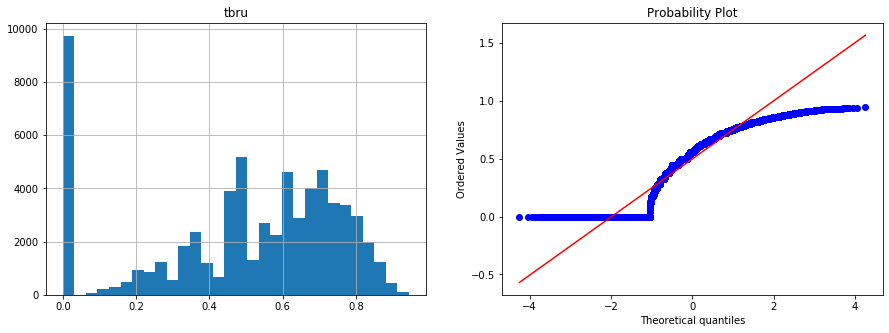

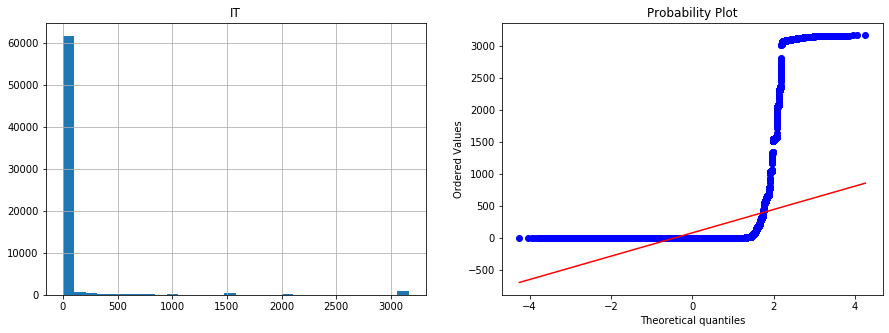

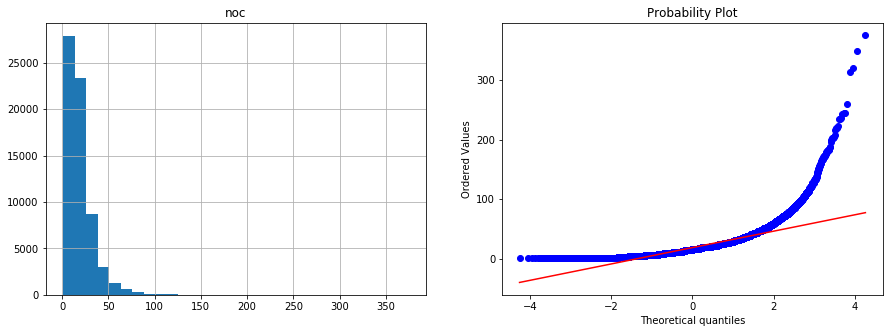

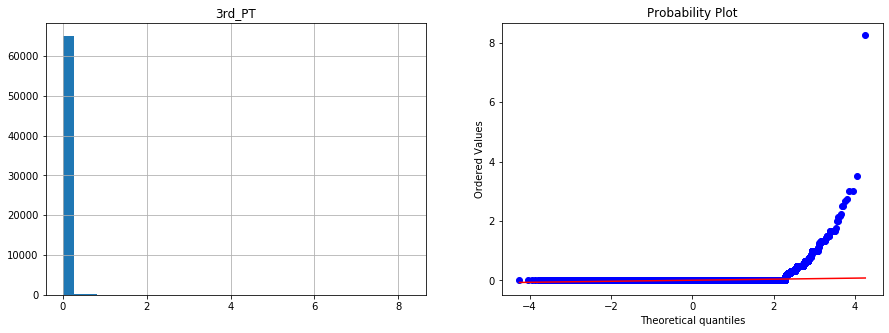

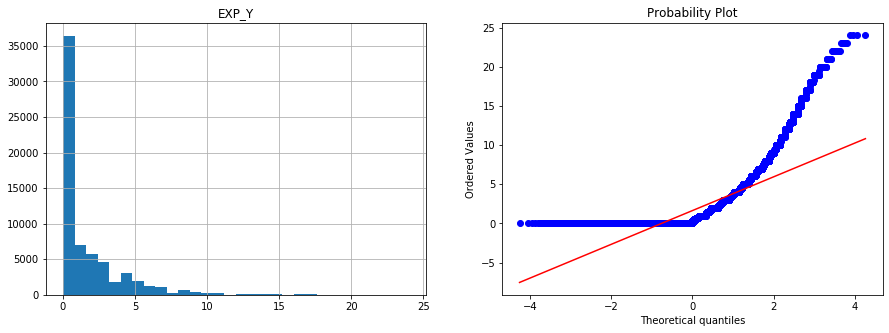

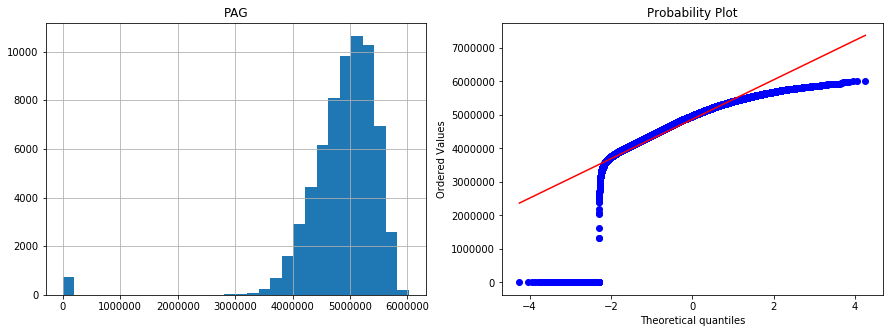

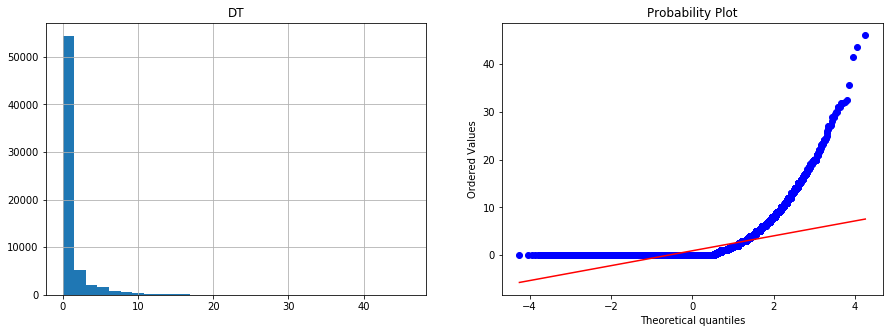

In [21]:
df=data
for variable in continuous:
    plt.figure(figsize=(15,5))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

In [23]:
# Finding Imp Features

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_feat = data.drop(['pat', 'fwd','FS'], axis=1)
y_feat = data['fwd'] 

bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X_feat,y_feat)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(10,'Score')) 

    Specs         Score
6    firm  3.718738e+09
10    PAG  4.358521e+07
17     IT  7.324914e+05
7     MSA  3.514951e+05
0   lag_d  7.981279e+04
11    npr  7.643663e+04
8     tbm  4.614207e+04
5     UMC  3.808932e+04
1     noc  3.692650e+04
12    fpr  2.435532e+04


[0.07827082 0.07723193 0.04759279 0.04194444 0.04703116 0.06972386
 0.06226389 0.0581765  0.07134785 0.06839774 0.07683401 0.05438361
 0.03893849 0.01325856 0.01895813 0.04836593 0.03209687 0.02221491
 0.01953676 0.0025946  0.05083714]


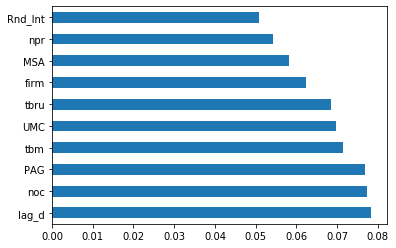

In [24]:
# Visualize Imp features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
X_feat = data.drop(['pat', 'fwd','FS'], axis=1)
y_feat = data['fwd'] 
model = ExtraTreesClassifier()
model.fit(X_feat,y_feat)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop(['fwd'], axis=1),
                                                    data['fwd'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((45874, 23), (19661, 23))

In [26]:
X_train[categorical] = X_train[categorical].astype('O')
X_test[categorical] = X_test[categorical].astype('O')

In [27]:
sample=pd.DataFrame(X_train,columns=X_train.columns)

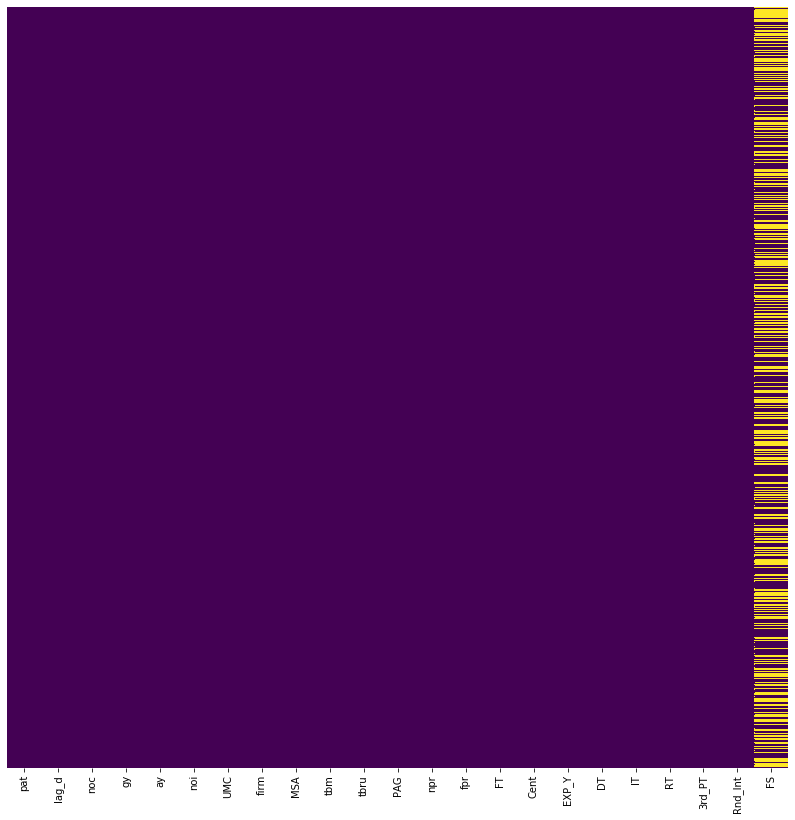

In [28]:
plt.figure(figsize=(14,14))
sns.heatmap(sample.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [11]:
# import relevant modules for feature engineering
from sklearn.pipeline import Pipeline
from feature_engine import missing_data_imputers as mdi
from feature_engine import categorical_encoders as ce
from feature_engine.variable_transformers import PowerTransformer
from feature_engine.discretisers import DecisionTreeDiscretiser
from feature_engine.outlier_removers import Winsorizer

In [12]:
patent_preprocess = Pipeline([
    ('imputer_num', mdi.MeanMedianImputer(imputation_method='median',
                                          variables=['FS'])),
     
    ('rare_label_enc', ce.RareLabelCategoricalEncoder(
         tol=0.0001,n_categories=5, variables=categorical)),
    ('categorical_enc', ce.OneHotCategoricalEncoder(variables = categorical)),
    
    ('pwt', PowerTransformer(variables=continuous,exp=1/ 2)),
    ('treeDisc' , DecisionTreeDiscretiser(cv=5, scoring='neg_mean_squared_error',regression=True,param_grid={'max_depth': [1,2,3,4,5,6]},variables=continuous)),
    ('winsorizer', Winsorizer(distribution='skewed', tail='both',fold=5,variables=continuous))
     
])

In [13]:
patent_preprocess.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('imputer_num',
                 MeanMedianImputer(imputation_method='median',
                                   variables=['FS'])),
                ('rare_label_enc',
                 RareLabelCategoricalEncoder(n_categories=5, tol=0.0001,
                                             variables=['gy', 'firm', 'ay',
                                                        'UMC', 'MSA', 'FT'])),
                ('categorical_enc',
                 OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                                          variables=['gy', 'firm', 'ay', 'UMC',
                                                     'MSA', 'FT...
                                         scoring='neg_mean_squared_error',
                                         variables=['noc', 'RT', 'pat', 'fpr',
                                                    'npr', 'Cent', '3rd_PT',
                                                    'Rnd_Int', 'IT', 'E

In [14]:
# Apply Transformations
X_train=patent_preprocess.transform(X_train)
X_test=patent_preprocess.transform(X_test)

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr= LinearRegression()

In [17]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [19]:
#Linear Regression 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

scores = cross_val_score(lr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))
X_train_preds = lr.predict(X_train)
X_test_preds = lr.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print()

Cross-validation scores: [0.18424544 0.23169011 0.17344876 0.19708168 0.19255353]
Average cross-validation score: 0.20
train mse: 825.2045783056919
train rmse: 28.726374263134772
train r2: 0.23902109535415128

test mse: 943.8836954344896
test rmse: 30.722690237583194
test r2: 0.19392239024610702



In [334]:
lr.score(X_train,y_train)

0.23902109535415128

In [335]:
lr.score(X_test,y_test)

0.19392239024610702

In [20]:
#Linear Regression using cross val score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt


lr = LinearRegression().fit(X_train, y_train)
cv_scores = cross_val_score(lr, X_train, y_train,cv=3)
X_train_preds = lr.predict(X_train)
X_test_preds = lr.predict(X_test)

# Mean Cross validation Score
print("Cross-validation scores: {}".format(cv_scores))
print("Mean Cross-validation scores: {:.2f}".format(cv_scores.mean()))

# Data set performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))



Cross-validation scores: [ 2.05408109e-01 -9.37512016e+07 -2.10516763e+11]
Mean Cross-validation scores: -70203504722.49
train mse: 825.2045783056919
train rmse: 28.726374263134772
train r2: 0.23902109535415128

test mse: 943.8836954344896
test rmse: 30.722690237583194
test r2: 0.19392239024610702


In [336]:
# Linear Regression with SGD and GridSearchCv

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

#sgd=SGDRegressor(max_iter=1000, tol = 1e-5, eta0=0.01)
reg_sgd_pipe = Pipeline([

    # feature Scaling
    ('scaler', MinMaxScaler()),
    # regression
    ('sgd_reg', SGDRegressor(max_iter=1000, tol = 1e-6))
])

param_sgd = {'sgd_reg__eta0':[0.01, 0.05, 0.1 ,0.5]}
grid_sgd = GridSearchCV(reg_sgd_pipe, param_sgd,cv=5, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')

grid_sgd.fit(X_train, y_train)

X_train_preds = grid_sgd.predict(X_train)
X_test_preds = grid_sgd.predict(X_test)

# Dataset performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))
print()

print("Best parameters: {}".format(grid_sgd.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_sgd.best_score_))
print()
print("Best estimator:\n{}".format(grid_sgd.best_estimator_))

train mse: 836.9436204665345
train rmse: 28.92997788569038
train r2: 0.22819570286361157

test mse: 939.4108007256068
test rmse: 30.649809146642443
test r2: 0.19774224675285323

Best parameters: {'sgd_reg__eta0': 0.05}
Best cross-validation score: -867.91

Best estimator:
Pipeline(memory=None,
         steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('sgd_reg',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.05, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=1e-06,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)


In [21]:
#Ridge Regression using GridSearchCV

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

param_ridge = {'alpha':np.logspace(-3,2,30)}

grid_ridge = GridSearchCV(ridge, param_ridge, cv=4, return_train_score = True)
grid_ridge.fit(X_train, y_train)

X_train_preds = grid_ridge.predict(X_train)
X_test_preds = grid_ridge.predict(X_test)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {}".format(grid_ridge.best_score_))

print()

# best parameters
print('Ridge parameters: ', grid_ridge.best_params_)

# Dataset Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))


Best Mean Cross-validation score: 0.2038743665001512

Ridge parameters:  {'alpha': 4.175318936560405}
train mse: 830.199697771948
train rmse: 28.81318617876107
train r2: 0.23441474604400658

test mse: 938.3361236309568
test rmse: 30.632272583518134
test r2: 0.1986600220549406


In [337]:
#Lasso Regression with GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from math import sqrt
from sklearn.metrics import r2_score,mean_squared_error
lasso = Lasso(random_state=42)


param_lasso = {'alpha':np.logspace(-2,2,10) }

grid_lasso = GridSearchCV(lasso, param_lasso, cv=4, return_train_score = True)
grid_lasso.fit(X_train, y_train)
X_train_preds = grid_lasso.predict(X_train)
X_test_preds = grid_lasso.predict(X_test)

# Dataset Performance
print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:}".format(grid_lasso.best_score_))
print()

# best parameters
print('Lasso parameters: ', grid_lasso.best_params_)

# Intercept
print("Lasso.intercept_:", grid_lasso.best_estimator_.intercept_)

# test score
print("Lasso Test Performance: ", grid_lasso.score(X_test,y_test))

train mse: 862.4287775166774
train rmse: 29.36713771406191
train r2: 0.204694055627766

test mse: 948.1744106996892
test rmse: 30.792440804517092
test r2: 0.19025811516450963
Best Mean Cross-validation score: 0.19201860947784505

Lasso parameters:  {'alpha': 0.01}
Lasso.intercept_: -128.05847712793596
Lasso Test Performance:  0.19025811516450966


In [22]:
#Elastic net using GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
elasticnet = ElasticNet()


param_elasticnet = {'alpha':np.logspace(-2,2,10), 'l1_ratio' :[0.3,0.4,0.5,0.6]}

grid_elasticnet = GridSearchCV(elasticnet , param_elasticnet, cv=5, return_train_score = True)
grid_elasticnet.fit(X_train, y_train)

X_train_preds = grid_elasticnet.predict(X_train)
X_test_preds = grid_elasticnet.predict(X_test)

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

# grid_elasticnet_train_score = grid_elasticnet.score(X_train, y_train)
# grid_elasticnet_test_score = grid_elasticnet.score(X_test, y_test)

# print('Training set score: ', grid_elasticnet_train_score)
# print('Test score: ', grid_elasticnet_test_score)

#find best parameters
print('Best parameters: ', grid_elasticnet.best_params_)
print('Best cross-validation score:', grid_elasticnet.best_score_)

train mse: 878.9011020525281
train rmse: 29.646266241341895
train r2: 0.18950377213709546

test mse: 959.6982947090247
test rmse: 30.978997638868574
test r2: 0.18041670681911992
Best parameters:  {'alpha': 0.01, 'l1_ratio': 0.6}
Best cross-validation score: 0.18361693671339333


In [ ]:
# KNN Regressor using GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

pipe_knn=Pipeline([ 
    ('scaler',MinMaxScaler()),
    ('knnreg', KNeighborsRegressor())
    
])

param_knn = {'knnreg__n_neighbors': range(1,4)}


grid_knn = GridSearchCV(pipe_knn, param_knn, cv=5, return_train_score=True)
grid_knn.fit(X_train, y_train)

print('train score: ', grid_knn.score(X_train, y_train))
print('test score: ', grid_knn.score(X_test, y_test))


print('Best parameters: ', grid_knn.best_params_)
print('Best cross-validation score:', grid_knn.best_score_)

In [ ]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)


param_dtree = {'max_depth': range(1,5),'min_samples_split':range(2,8,1),'criterion':['mse','mae']}


grid_dtree = GridSearchCV(dtree, param_dtree, cv=5, return_train_score = True)
grid_dtree.fit(X_train, y_train)

# Mean Cross Validation Score
print("Best Mean Cross-validation score: {:.2f}".format(grid_dtree.best_score_))
print()

# best parameters
print('Decision Tree parameters: ', grid_dtree.best_params_)

# data set performance
print("Decision Tree Performance: ", grid_dtree.score(X_test,y_test))

In [ ]:
#SVR using GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr=SVR()
param_grid = [{'kernel': ['rbf'],
               'C': [0.001, 0.01, 0.1, 1],
               'gamma': [  0.1, 1,10,100]},
              {'kernel': ['poly'],
               'degree':[1,2],
               'C': [0.001, 0.01, 0.1, 1],
               'gamma': [ 0.01, 0.1, 1,10]},
              {'kernel': ['sigmoid'],
               'C': [ 0.01, 0.1, 1,10],
               'gamma': [ 0.01, 0.1, 1,10]}]
grid_svr = GridSearchCV(svr, param_grid, cv=3,
                          return_train_score=True)
grid_svr.fit(X_train, y_train)
print('train score: ', grid_svr.score(X_train, y_train))
print('test score: ', grid_svr.score(X_test, y_test))
print("Best parameters: {}".format(grid_svr.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_svr.best_score_))

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from math import sqrt
pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures(degree=2)),
    ('norm_reg',LinearRegression())
])
    
param_poly = [{'norm_reg':[LinearRegression()]},
              {'norm_reg':[Lasso()],'norm_reg__alpha':[0.01,0.1,1]}
              {'norm_reg':[Ridge()],'norm_reg__alpha':[0.01,0.1,1]}
             ]
grid_poly = GridSearchCV(pipe_poly, param_poly,cv=5, return_train_score = True,scoring='r2')
grid_poly.fit(X_train, y_train)

# let's get the predictions
X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

#find best parameters
print('Best parameters: ', grid_poly.best_params_)
print('Best cross validation score: ', grid_poly.best_score_)

Models - Decision Tree Regressor , KNN REGRESSOR , SVR , Polynomial Regression 

I was unable to run these models because it took long to converge 

Kindly accept my apology
Instead I've tried and run those models without any specific hyper parameter

In [19]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor(random_state=42)

dtree.fit(X_train, y_train)


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=42, splitter='best')

In [20]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(dtree, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.56296073 -0.45831461 -0.50008122 -0.36957363 -0.52063082]
Average cross-validation score: -0.48


In [27]:
dtree.score(X_train,y_train)

0.9996042737374599

In [28]:
dtree.score(X_test,y_test)

-0.443979079480634

In [23]:
#KNN
from sklearn.neighbors import KNeighborsRegressor
knn= KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [24]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

Cross-validation scores: [-0.00294769 -0.01246879 -0.04332171  0.01263915 -0.0324651 ]
Average cross-validation score: -0.02


In [31]:
knn.score(X_train,y_train)

0.33278641016111943

In [32]:
knn.score(X_test,y_test)

-0.007483207800653257

In [36]:
# Polynomial Regression using GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

pipe_poly=Pipeline([ 
    ('polynomialfeatures', PolynomialFeatures()),
    ('scaler',MinMaxScaler()),
    ('norm_reg', LinearRegression())
    
])

param_poly = {'polynomialfeatures__degree':range(1,3)}

grid_poly = GridSearchCV(pipe_poly, param_poly,cv=2, n_jobs=-1, return_train_score = True,scoring='neg_mean_squared_error')


grid_poly.fit(X_train, y_train)

X_train_preds = grid_poly.predict(X_train)
X_test_preds = grid_poly.predict(X_test)

# model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds)))
print('train rmse: {}'.format(sqrt(mean_squared_error(y_train, X_train_preds))))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds)))
print('test rmse: {}'.format(sqrt(mean_squared_error(y_test, X_test_preds))))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

#find best parameters
print('Best parameters: ', grid_poly.best_params_)
print('Best cross validation score: ', grid_poly.best_score_)

train mse: 825.1920773626366
train rmse: 28.726156675800482
train r2: 0.2390326233487885

test mse: 943.9804395440211
test rmse: 30.724264670517684
test r2: 0.19383977068085112
Best parameters:  {'polynomialfeatures__degree': 1}
Best cross validation score:  -2.61346416983008e+23


In [ ]:
#SVR 
from sklearn.svm import SVR

svr=SVR()
svr.fit(X_train, y_train)


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svr, X_train, y_train)
print("Cross-validation scores: {}".format(scores))
print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [ ]:
svr.score(X_train,y_train)

In [ ]:
svr.score(X_test,y_test)

SVR without hyperparameters also took long time to run and hence couldnt submit the answers